In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
%matplotlib inline

#This is just the Seaborn style
sns.set(style="whitegrid")
#This is our data frame

#different data path specified for my computer
df = pd.read_csv(r"C:\Users\mario\Documents\UNBC Work\UNBC Winter 2020\Cpsc 371 - Artificial Intelligence\Cpsc 371 - Assignment 2\MELBOURNE_HOUSE_PRICES_LESS.csv", delimiter = ',')



#Drop rows with NaN values in "Price"
prices = df["Price"].dropna()

In [2]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [3]:
#Print the Data Types in each Column.
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [4]:
import statistics
#Print the Mean, Median, Mode, Max, Min
mean = df["Price"].mean()
median = df["Price"].median()
mode = df["Price"].mode()
maximum = df["Price"].max()
minimum = df["Price"].min()
stdev = statistics.stdev(prices)
pstdev = statistics.pstdev(prices)

print("Mean price in 2017 $%.2f" % mean)
print("Median price in 2017 $%.2f" % median)
print("Mode price in 2017 $%.2f" % mode)
print("Max price in 2017 $%.2f" % maximum)
print("Min price in 2017 $%.2f" % minimum)
print("Sample Standard Deviation $%.2f" % stdev)
print("Population Standard Deviation $%.2f" % pstdev)

Mean price in 2017 $997898.24
Median price in 2017 $830000.00
Mode price in 2017 $600000.00
Max price in 2017 $11200000.00
Min price in 2017 $85000.00
Sample Standard Deviation $593498.92
Population Standard Deviation $593492.79


Max Price 11200000.0
Min Price 85000.0
Mean Price 997898.2414882415


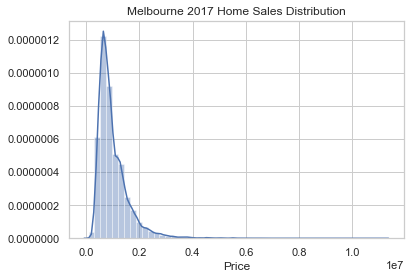

In [5]:
fig1, bw = plt.subplots()
bw.set_title('Melbourne 2017 Home Sales Distribution')

sns.distplot(prices);

print("Max Price", prices.max())
print("Min Price", prices.min())
print("Mean Price", prices.mean())

#Too many high-end homes. We need to choose a better Max Value. The data is too skewed.

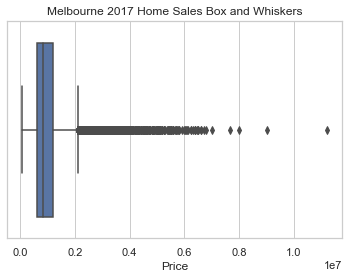

In [6]:
fig2, bw = plt.subplots()
bw.set_title('Melbourne 2017 Home Sales Box and Whiskers')

#Box and Whisker Plot in Seaborn
boxplot = sns.boxplot(x=prices)

#Too many high-end homes. We need to choose a better Max Value. The data is too skewed.

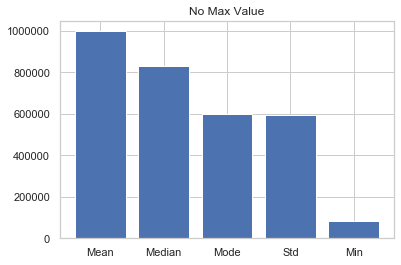

In [7]:
fig2, bw = plt.subplots()
bw.set_title('No Max Value')
#Plot the data details.
height = [mean, median, mode, stdev, minimum]
bars = ('Mean', 'Median', 'Mode', 'Std', 'Min')

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

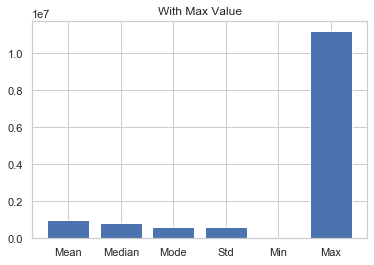

In [8]:
fig2, bw = plt.subplots()
bw.set_title('With Max Value')

#Plot the data details.
height = [mean, median, mode, stdev, minimum, maximum]
bars = ('Mean', 'Median', 'Mode', 'Std', 'Min', 'Max')

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

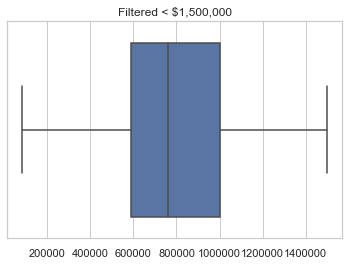

In [9]:
fig2, bw = plt.subplots()
bw.set_title('Filtered < $1,500,000')

#We need to filter these max outliers. 
price_filter = []

#Filter the data for sales < $1,500,000
for item in prices:
    if(item < 1500000):
        price_filter.append(item)
        
#Box and Whisker Plot Round 2
boxplot = sns.boxplot(x=price_filter)

In [10]:
#Get a 25% sample of the data set so there isn't so much noise.
df_sample = df.sample(frac=0.25, replace=True, random_state=1)

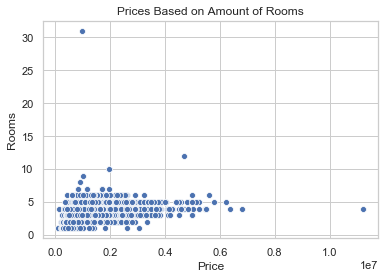

In [11]:
fig2, bw = plt.subplots()
bw.set_title('Prices Based on Amount of Rooms')

#Scatter Plot of Prices by Room Amount

#Display Scatterplot
sp = sns.scatterplot(x="Price", y="Rooms", data=df_sample)

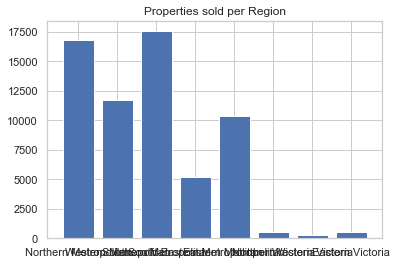

In [12]:
#Most properties per neighbourhood? in progress, need to fix names in graph

fig2, bw = plt.subplots()
bw.set_title('Properties sold per Region')

# propteryCounts values correspond to count of appeared values in df['Regionname'].value_counts() and in order of listOfRegionNames output
listOfRegionNames = df.Regionname.unique()
propertyCounts = [16781, 11717, 17559, 5212, 10396, 556, 238, 564] 

y_pos = np.arange(len(listOfRegionNames))
 
# Create bars
plt.bar(y_pos, propertyCounts)
 
# Create names on the x-axis
plt.xticks(y_pos, listOfRegionNames)
 
# Show graphic
plt.show()


In [13]:
listOfRegionNames = df.Regionname.unique()
print(listOfRegionNames)

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'South-Eastern Metropolitan' 'Eastern Metropolitan' 'Northern Victoria'
 'Western Victoria' 'Eastern Victoria']


In [14]:
df['Regionname'].value_counts()

Southern Metropolitan         17559
Northern Metropolitan         16781
Western Metropolitan          11717
Eastern Metropolitan          10396
South-Eastern Metropolitan     5212
Eastern Victoria                564
Northern Victoria               556
Western Victoria                238
Name: Regionname, dtype: int64

In [15]:
df.dtypes
#Most expensive neighbourhoods?
#Most popular months to sell?
#Bar Chart of Outlier Prices?
#Normal Distribution of Prices?

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

([<matplotlib.patches.Wedge at 0x23a497bef48>,
 [Text(0.7048539931208552, 0.8445003542815038, 'Southern Metropolitan'),
  Text(-0.9351726634347142, 0.5791822593661022, 'Northern Metropolitan'),
  Text(-0.712611815763471, -0.8379644384067196, 'Western Metropolitan'),
  Text(0.4258924691744499, -1.0142068845657135, 'Eastern Metropolitan'),
  Text(1.0152125369849885, -0.4234896749018844, 'South-Eastern Metropolitan'),
  Text(1.093676877406041, -0.11777473339970511, 'Eastern Victoria'),
  Text(1.0985447874256338, -0.05656279713707064, 'Northern Victoria'),
  Text(1.099922588263002, -0.013049897655492292, 'Western Victoria')])

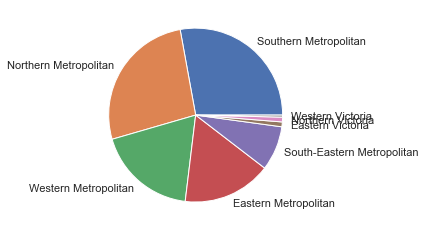

In [26]:
piGraphData = {'RegionNames': ['Southern Metropolitan', 'Northern Metropolitan','Western Metropolitan','Eastern Metropolitan','South-Eastern Metropolitan','Eastern Victoria','Northern Victoria','Western Victoria'],
                'PropertyCount': [17559, 16781, 11717, 10396, 5212, 564, 556, 238]}

PiGraphFrame = pd.DataFrame(piGraphData, columns = ['RegionNames', 'PropertyCount'])

#plots property count per regions
plt.pie(    
    PiGraphFrame['PropertyCount'],
    labels=PiGraphFrame['RegionNames'],
    )


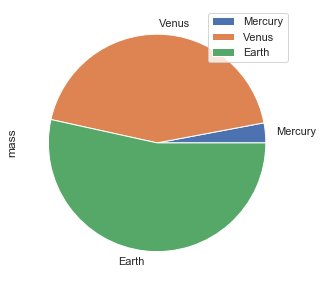